In [2]:
# https://raw.githubusercontent.com/fenago/datasets/main/data.csv
# https://raw.githubusercontent.com/fenago/datasets/main/data.csv
# https://www.kaggle.com/shree1992/housedata

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/data.csv')
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3017,2014-06-21 00:00:00,639500.0,4.0,2.25,2330,8994,2.0,0,0,3,2330,0,1986,0,14106 176th Ave NE,Redmond,WA 98052,USA
1327,2014-05-27 00:00:00,360000.0,3.0,1.00,1050,9206,1.5,0,0,3,1050,0,1954,2005,10710 Lake City Way NE,Seattle,WA 98125,USA
2000,2014-06-05 00:00:00,376000.0,4.0,2.75,2420,5773,2.0,0,0,3,2420,0,2005,0,25025 234th Pl SE,Maple Valley,WA 98038,USA
1061,2014-05-21 00:00:00,210000.0,3.0,1.00,1240,4842,1.0,0,0,4,1240,0,1916,0,9612-9618 Renton Ave S,Seattle,WA 98118,USA
3764,2014-07-01 00:00:00,485000.0,4.0,1.75,1430,4096,2.0,0,0,3,1430,0,1900,2005,216 20th Ave,Seattle,WA 98122,USA


# Delete Unnecessary columns

In [4]:
to_drop = ['date', 'street', 'statezip', 'country']
df = df.drop(to_drop, axis=1)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


# Feature Engineering

In [5]:
# How old is the house?
df['house_age'] = [2021 - yr_built for yr_built in df['yr_built']]

# Was the house renovated and was the renovation recent?
df['was_renovated'] = [1 if yr_renovated != 0 else 0
    for yr_renovated in df['yr_renovated']]
df['was_renovated_10_yrs'] = [1 if (2021 - yr_renovated) <= 10
    else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_30_yrs'] = [1 if 10 < (2021 - yr_renovated) <= 30
    else 0 for yr_renovated in df['yr_renovated']]

# Drop original columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,100,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0,1


In [7]:
# I must encode the city column
def remap_location(data: pd.DataFrame,
                   location: str,
                   threshold: int = 50) -> str:
    if len(data[data['city'] == location]) < threshold:
        return 'Rare'
    return location

In [8]:
remap_location(data=df, location='Seattle')

'Seattle'

In [9]:
remap_location(data=df, location='Fall City')

'Rare'

In [10]:
df['city'] = df['city'].apply(
    lambda x: remap_location(data=df, location=x)
)
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
3010,339990.0,3.0,2.50,2570,4600,2.0,0,0,3,2570,0,Auburn,7,0,0,0
1379,780000.0,3.0,3.00,2520,2152,1.5,0,0,3,1560,960,Seattle,96,1,0,1
2172,489000.0,3.0,3.50,1500,1249,2.0,0,0,3,1240,260,Seattle,17,1,0,1
1952,1075000.0,5.0,4.75,5180,17811,2.0,0,2,3,4070,1110,Snoqualmie,20,0,0,0
3459,495000.0,3.0,1.75,1440,11787,1.0,0,0,3,1440,0,Sammamish,38,1,0,1
1646,568000.0,4.0,2.00,2340,50233,1.0,0,0,4,1170,1170,Sammamish,55,0,0,0
1195,655000.0,4.0,2.50,2860,12394,2.0,0,0,3,2860,0,Sammamish,22,0,0,0
497,335000.0,3.0,2.50,1940,4927,2.0,0,0,3,1940,0,Renton,17,1,0,1
87,620000.0,3.0,1.75,1480,2185,2.5,0,0,3,1480,0,Kirkland,16,0,0,0
2645,204950.0,4.0,1.75,1740,9344,1.0,0,0,3,1180,560,Federal Way,43,0,0,0


# Target Variable Distribution

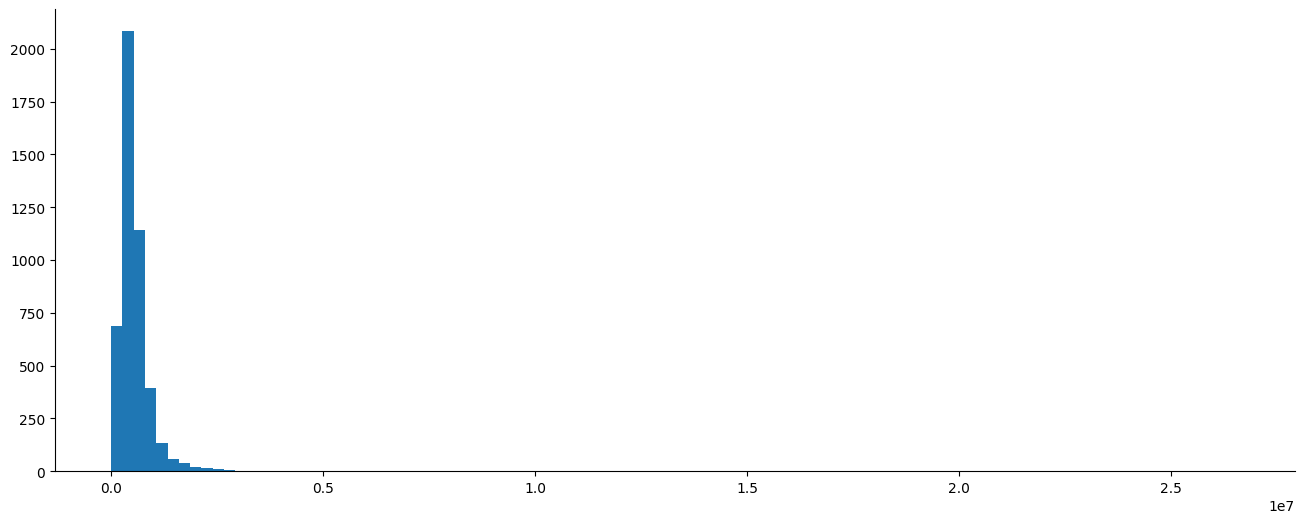

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.hist(df['price'], bins=100);

In [12]:
## Outlier processing using Z test score

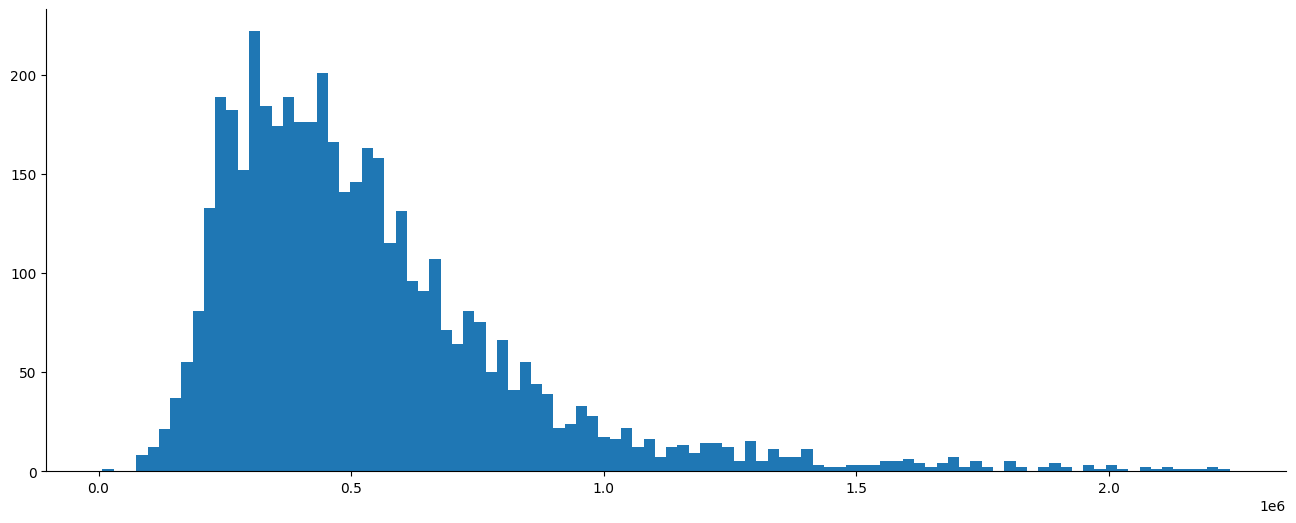

In [13]:
from scipy import stats


# Calculate Z-values
df['price_z'] = np.abs(stats.zscore(df['price']))

# Filter out outliers
df = df[df['price_z'] <= 3]

# Remove houses listed for $0
df = df[df['price'] != 0]

# Drop the column
df = df.drop('price_z', axis=1)

# Draw a histogram
plt.hist(df['price'], bins=100);

# Prep the Data ( encode and scale )

In [14]:
# StandardScaler -- data has mean of 0 and variance of 1 (standard deviation of 1... data is normalized)
# MinMaxScaler -- between 0 and 1... really good for KNN and Neural Networks
# RobustScaler -- features that have a lot of outliers that can't be removed
# MaxAbsScaler -- Scales by absolute value... when the data at 0 or sparse
# PowerTransformer -- This is when the dat is not normalized and you want to make it normalized
# Normalizer - Scales features to have a unit norm - text classifcation - clustering

In [15]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


transformer = make_column_transformer(
    (MinMaxScaler(),
        ['sqft_living', 'sqft_lot','sqft_above',
         'sqft_basement', 'house_age']),
    (OneHotEncoder(handle_unknown='ignore'),
        ['bedrooms', 'bathrooms', 'floors',
         'view', 'condition'])
)

In [16]:
from sklearn.model_selection import train_test_split


X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
# Fit
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [18]:
X_train.toarray()

array([[0.21438849, 0.33897196, 0.21438849, ..., 1.        , 0.        ,
        0.        ],
       [0.26043165, 0.00742988, 0.10503597, ..., 0.        , 0.        ,
        1.        ],
       [0.55251799, 0.02588045, 0.55251799, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.27194245, 0.01478794, 0.27194245, ..., 1.        , 0.        ,
        0.        ],
       [0.56115108, 0.00799192, 0.4028777 , ..., 0.        , 0.        ,
        1.        ],
       [0.21007194, 0.01236491, 0.21007194, ..., 1.        , 0.        ,
        0.        ]])

In [19]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [20]:
X_train

array([[0.21438849, 0.33897196, 0.21438849, ..., 1.        , 0.        ,
        0.        ],
       [0.26043165, 0.00742988, 0.10503597, ..., 0.        , 0.        ,
        1.        ],
       [0.55251799, 0.02588045, 0.55251799, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.27194245, 0.01478794, 0.27194245, ..., 1.        , 0.        ,
        0.        ],
       [0.56115108, 0.00799192, 0.4028777 , ..., 0.        , 0.        ,
        1.        ],
       [0.21007194, 0.01236491, 0.21007194, ..., 1.        , 0.        ,
        0.        ]])

In [21]:
X_test

array([[0.23309353, 0.0063136 , 0.11798561, ..., 0.        , 1.        ,
        0.        ],
       [0.34100719, 0.06622723, 0.34100719, ..., 1.        , 0.        ,
        0.        ],
       [0.48920863, 0.00534252, 0.33669065, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.05035971, 0.00680539, 0.05035971, ..., 1.        , 0.        ,
        0.        ],
       [0.29784173, 0.00650875, 0.29784173, ..., 1.        , 0.        ,
        0.        ],
       [0.41294964, 0.01195431, 0.41294964, ..., 1.        , 0.        ,
        0.        ]])

In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [23]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [24]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
113/113 [==============================] - 3s 7ms/step - loss: 607252.6250 - rmse: 607271.5000
Epoch 2/100
113/113 [==============================] - 0s 4ms/step - loss: 428424.0625 - rmse: 428241.0938
Epoch 3/100
113/113 [==============================] - 1s 4ms/step - loss: 268024.6250 - rmse: 267999.9688
Epoch 4/100
113/113 [==============================] - 0s 4ms/step - loss: 248595.2031 - rmse: 248536.2188
Epoch 5/100
113/113 [==============================] - 0s 4ms/step - loss: 238776.0938 - rmse: 238843.1250
Epoch 6/100
113/113 [==============================] - 1s 4ms/step - loss: 230563.4688 - rmse: 230514.0938
Epoch 7/100
113/113 [==============================] - 0s 4ms/step - loss: 226895.8906 - rmse: 226863.8750
Epoch 8/100
113/113 [==============================] - 1s 5ms/step - loss: 222464.4375 - rmse: 222493.9844
Epoch 9/100
113/113 [==============================] - 0s 4ms/step - loss: 218565.7812 - rmse: 218509.1562
Epoch 10/100
113/113 [===============

In [25]:
predictions = model.predict(X_test)
predictions[:5]

29/29 [==============================] - 0s 2ms/step


array([[ 496020.47],
       [ 598917.94],
       [1228143.  ],
       [ 277848.5 ],
       [ 320645.25]], dtype=float32)

In [26]:
predictions = np.ravel(predictions)
predictions[:5]

array([ 496020.47,  598917.94, 1228143.  ,  277848.5 ,  320645.25],
      dtype=float32)

In [27]:
rmse(y_test, predictions).numpy()

191042.0414150369

# Classification

In [28]:
## Dataset https://raw.githubusercontent.com/fenago/datasets/main/winequalityN.csv

In [39]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/winequalityN.csv')
df.sample(5)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3987,white,7.3,0.23,0.41,14.60,0.048,73.0,223.0,0.99863,3.16,0.71,9.40,6
1070,white,8.0,0.37,0.32,1.60,0.040,32.0,166.0,0.99200,3.00,0.55,11.30,7
777,white,7.2,0.23,0.19,13.70,0.052,47.0,197.0,0.99865,3.12,0.53,9.00,5
4437,white,6.5,0.29,0.30,9.15,0.051,25.0,166.0,0.99339,3.24,0.56,11.35,6
1178,white,9.8,0.44,0.40,2.80,0.036,35.0,167.0,0.99560,2.97,0.39,9.20,5


In [40]:
df.shape

(6497, 13)

In [41]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [42]:
df = df.dropna()
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [43]:
df['is_white_wine'] = [
    1 if typ == 'white' else 0 for typ in df['type']]
df.drop('type', axis=1, inplace=True)

In [44]:
df['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

In [45]:
df['is_good_wine'] = [
    1 if quality >= 6 else 0 for quality in df['quality']
]
df.drop('quality', axis=1, inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine,is_good_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [46]:
from sklearn.model_selection import train_test_split


X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# For Regression problems : use RMSE for loss function
# For Binary Classification : use binary cross-entropy, don't use categorical cross entropy

In [50]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
162/162 [==============================] - 4s 7ms/step - loss: 0.5270 - accuracy: 0.7414 - precision: 0.7736 - recall: 0.8375
Epoch 2/100
162/162 [==============================] - 1s 8ms/step - loss: 0.4929 - accuracy: 0.7609 - precision: 0.7988 - recall: 0.8329
Epoch 3/100
162/162 [==============================] - 1s 9ms/step - loss: 0.4788 - accuracy: 0.7706 - precision: 0.8038 - recall: 0.8445
Epoch 4/100
162/162 [==============================] - 1s 6ms/step - loss: 0.4629 - accuracy: 0.7805 - precision: 0.8220 - recall: 0.8348
Epoch 5/100
162/162 [==============================] - 1s 7ms/step - loss: 0.4522 - accuracy: 0.7876 - precision: 0.8255 - recall: 0.8436
Epoch 6/100
162/162 [==============================] - 2s 12ms/step - loss: 0.4426 - accuracy: 0.7915 - precision: 0.8292 - recall: 0.8454
Epoch 7/100
162/162 [==============================] - 2s 13ms/step - loss: 0.4324 - accuracy: 0.7992 - precision: 0.8350 - recall: 0.8518
Epoch 8/100
162/162 [===========

In [51]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

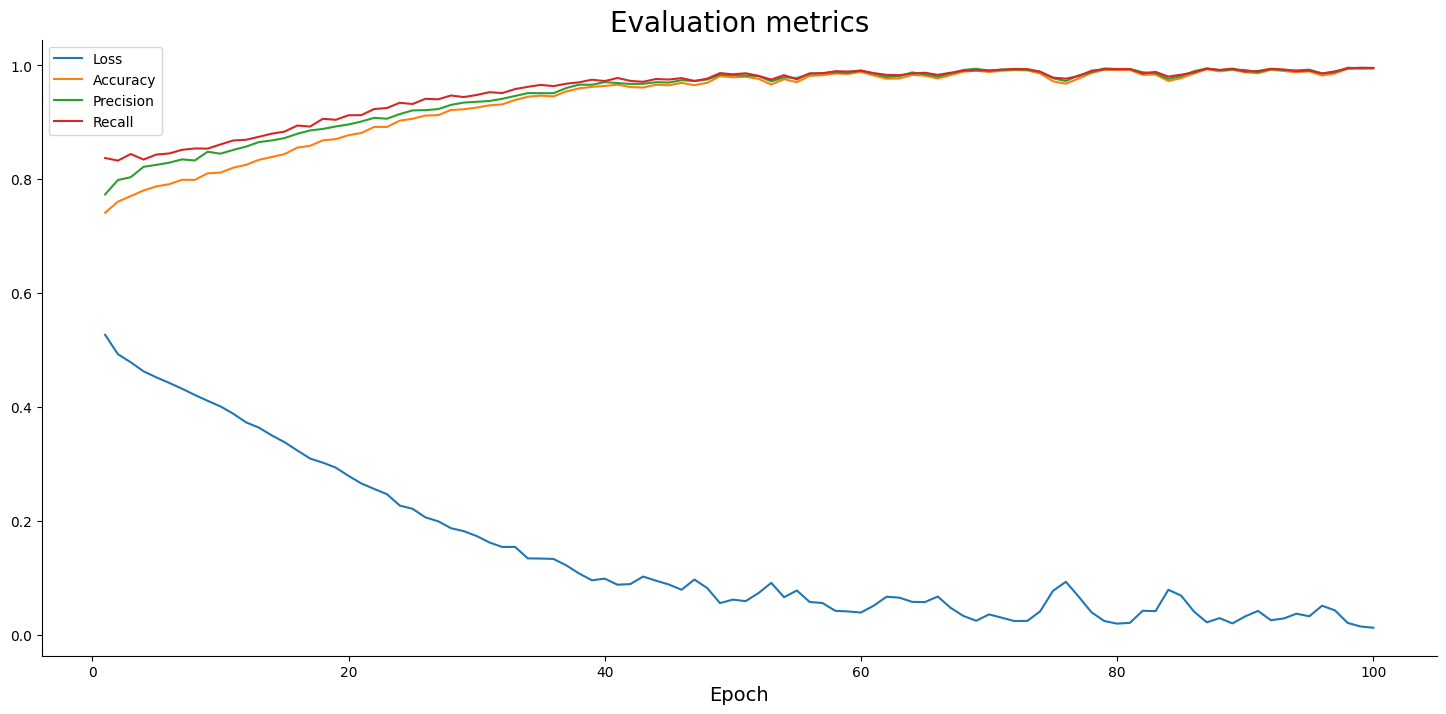

In [52]:
plt.plot(
    np.arange(1, 101),
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101),
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101),
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101),
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [53]:
predictions = model.predict(X_test_scaled)

41/41 [==============================] - 0s 4ms/step


In [54]:
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]
prediction_classes

[0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,


In [57]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction_classes))

[[348 134]
 [119 692]]


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.80
Precision: 0.84
Recall: 0.85


# Optimize the Learning Rate

In [59]:
import tensorflow as tf
tf.random.set_seed(42)

In [60]:
initial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

initial_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

initial_history = initial_model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ]
)

Epoch 1/100
162/162 [==============================] - 4s 10ms/step - loss: 0.5261 - accuracy: 0.7327 - lr: 0.0010
Epoch 2/100
162/162 [==============================] - 2s 11ms/step - loss: 0.4951 - accuracy: 0.7634 - lr: 0.0011
Epoch 3/100
162/162 [==============================] - 3s 16ms/step - loss: 0.4814 - accuracy: 0.7696 - lr: 0.0012
Epoch 4/100
162/162 [==============================] - 1s 8ms/step - loss: 0.4667 - accuracy: 0.7795 - lr: 0.0013
Epoch 5/100
162/162 [==============================] - 2s 10ms/step - loss: 0.4585 - accuracy: 0.7847 - lr: 0.0014
Epoch 6/100
162/162 [==============================] - 1s 8ms/step - loss: 0.4497 - accuracy: 0.7903 - lr: 0.0015
Epoch 7/100
162/162 [==============================] - 1s 9ms/step - loss: 0.4432 - accuracy: 0.7923 - lr: 0.0016
Epoch 8/100
162/162 [==============================] - 1s 9ms/step - loss: 0.4369 - accuracy: 0.7921 - lr: 0.0017
Epoch 9/100
162/162 [==============================] - 2s 9ms/step - loss: 0.4284 - 

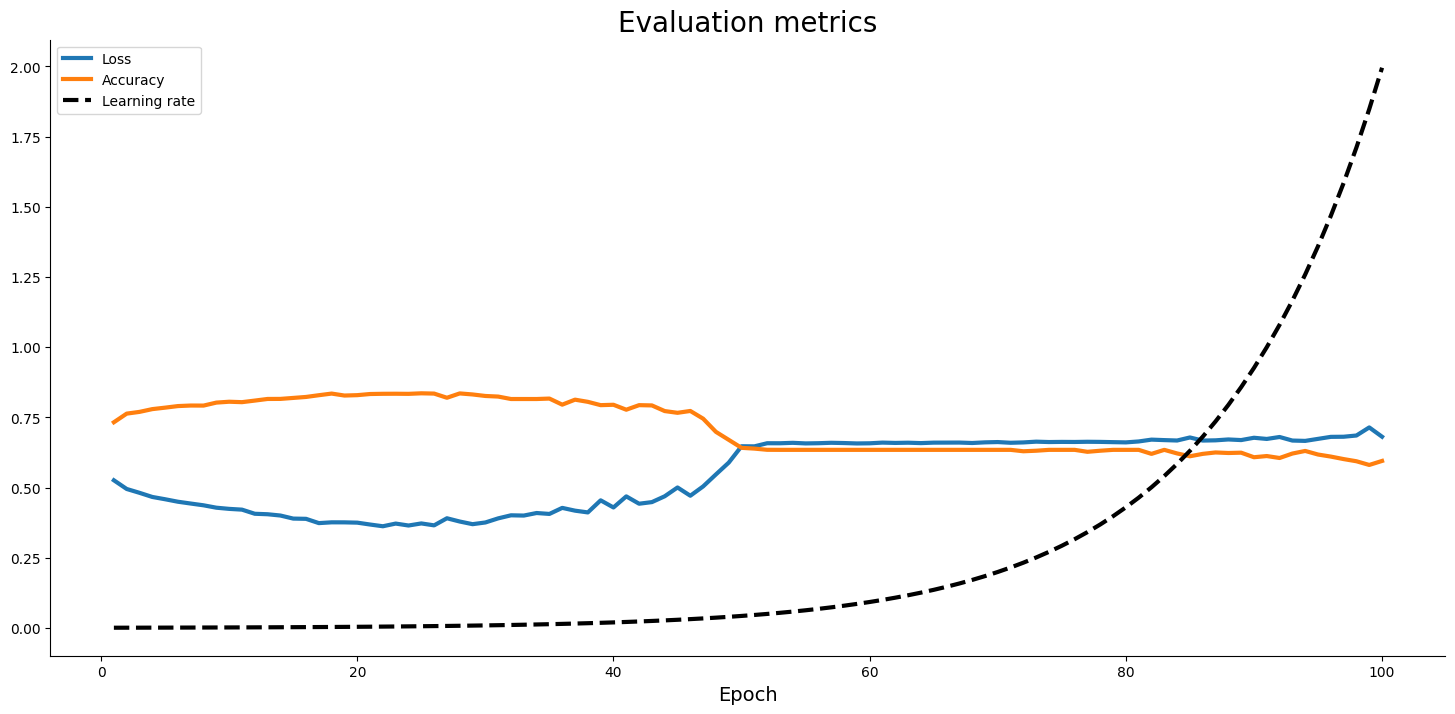

In [61]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 101),
    initial_history.history['loss'],
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101),
    initial_history.history['accuracy'],
    label='Accuracy', lw=3
)
plt.plot(
    np.arange(1, 101),
    initial_history.history['lr'],
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

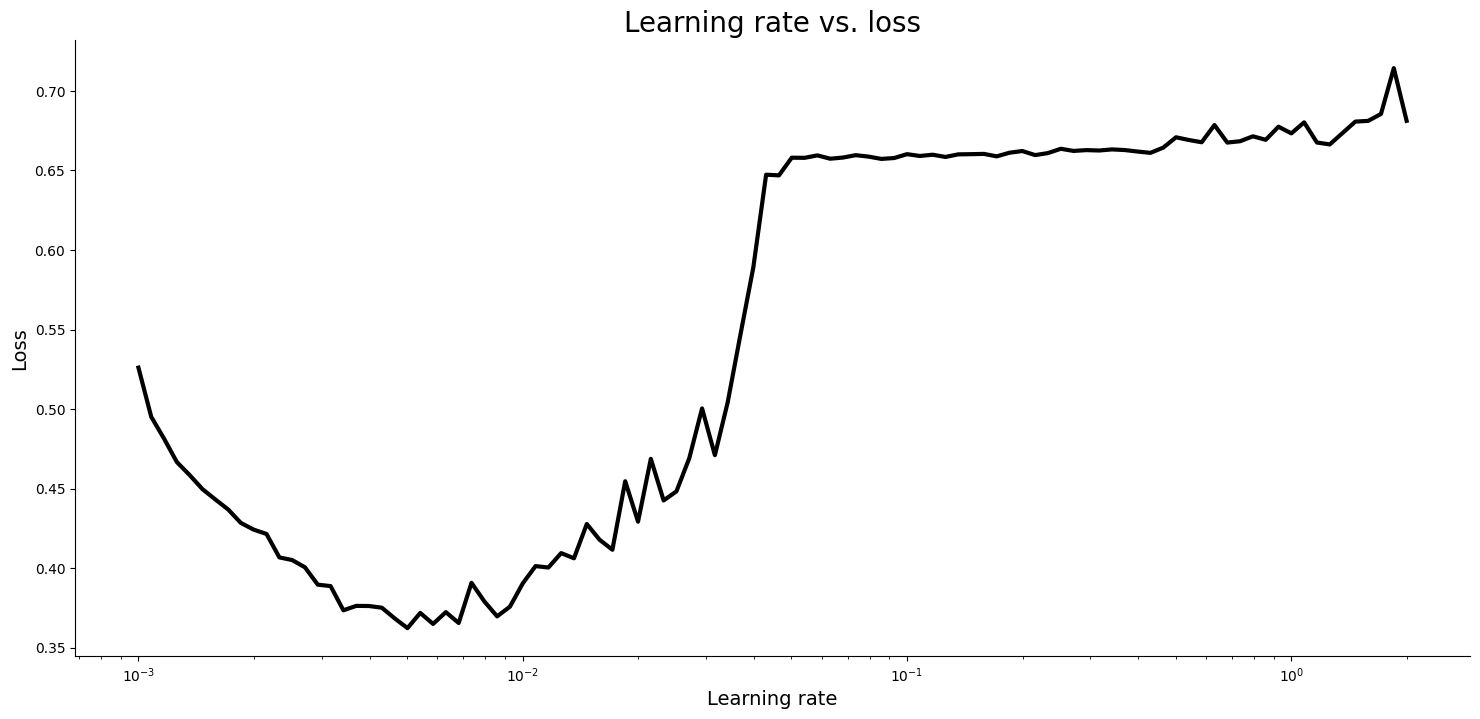

In [62]:
learning_rates = 1e-3 * (10 ** (np.arange(100) / 30))
plt.semilogx(
    learning_rates,
    initial_history.history['loss'],
    lw=3, color='#000'
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14);

In [63]:
# with lr = 0.007 , re train the model
model_optimized = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_optimized.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history_optimized = model_optimized.fit(
    X_train_scaled,
    y_train,
    epochs=100
)

Epoch 1/100
162/162 [==============================] - 3s 6ms/step - loss: 0.5337 - accuracy: 0.7410
Epoch 2/100
162/162 [==============================] - 1s 7ms/step - loss: 0.5104 - accuracy: 0.7573
Epoch 3/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4993 - accuracy: 0.7573
Epoch 4/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4892 - accuracy: 0.7679
Epoch 5/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4857 - accuracy: 0.7694
Epoch 6/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4759 - accuracy: 0.7745
Epoch 7/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4719 - accuracy: 0.7776
Epoch 8/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4629 - accuracy: 0.7816
Epoch 9/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4562 - accuracy: 0.7876
Epoch 10/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4517 - accura

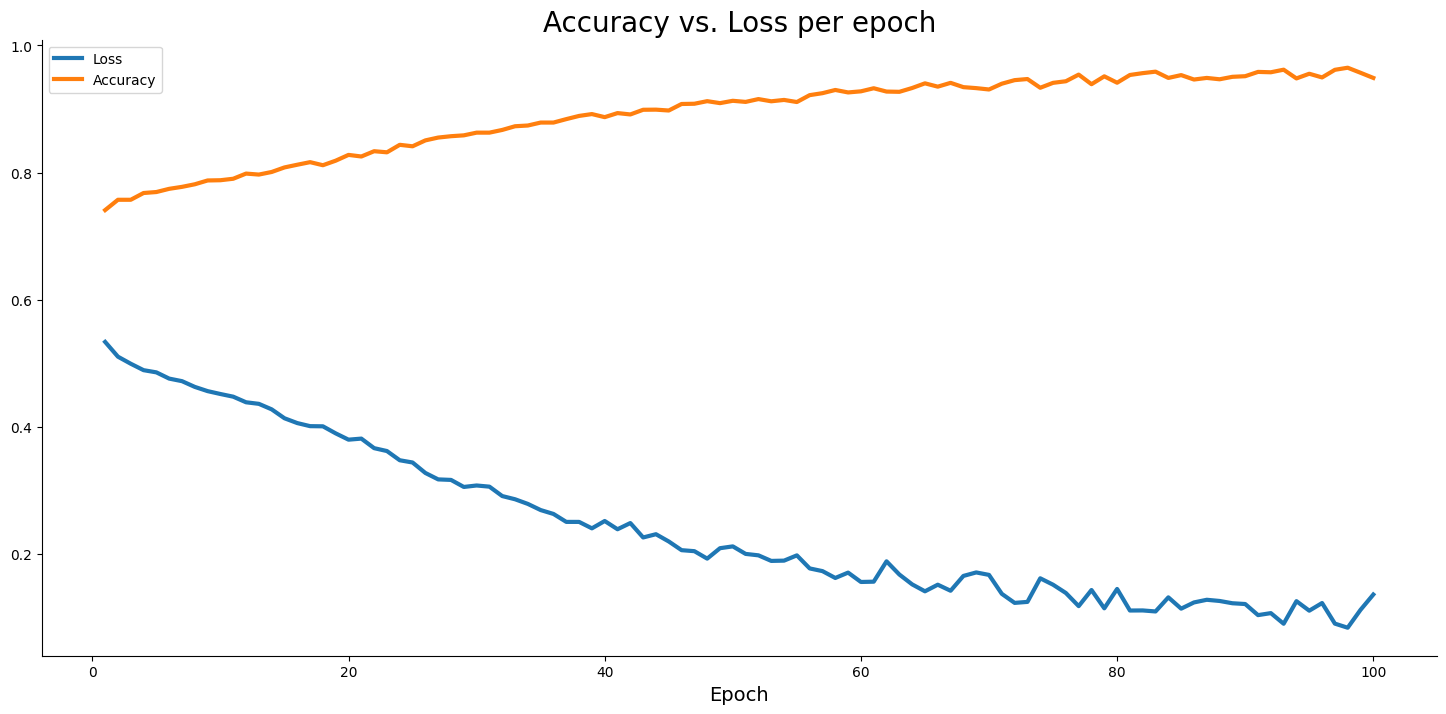

In [64]:
plt.plot(
    np.arange(1, 101),
    history_optimized.history['loss'],
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101),
    history_optimized.history['accuracy'],
    label='Accuracy', lw=3
)
plt.title('Accuracy vs. Loss per epoch', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predictions = model_optimized.predict(X_test_scaled)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]


print(f'Accuracy on the test set: {accuracy_score(y_test, prediction_classes):.2f}')
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, prediction_classes))

41/41 [==============================] - 0s 2ms/step
Accuracy on the test set: 0.79

Confusion matrix:
[[362 120]
 [147 664]]
